In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix


In [67]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data (1).csv


In [68]:
data = pd.read_csv('Company_Data.csv')

In [69]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [71]:
encoder =LabelEncoder()

In [72]:
col = data.select_dtypes("object")

In [73]:
for i in col.columns:
  data[i] = encoder.fit_transform(data[i])

In [74]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [75]:
bins = np.linspace(min(data['Sales']), max(data['Sales']), 4)
bins
#This will divide the range of values from the minimum to the maximum into four equal intervals.

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [76]:
data["sales_catagory"] = pd.cut(data["Sales"],bins=bins,labels=["Low","Medium","High"],include_lowest=True)
#This will divide the range of values from the minimum to the maximum into four equal intervals.
      # above one is method 1 and below one is method 2
# bins replace the quntile values 0-25% is low 25%-75%-medium above 75% is high sales

In [77]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_catagory
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low


In [78]:
data =data.drop("Sales",axis=1)
data.sample()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_catagory
378,133,88,3,105,119,2,79,12,1,1,Medium


features Selection

In [79]:
x = data.drop(columns=["sales_catagory"],axis=1)

In [80]:
data["sales_catagory"] = encoder.fit_transform(data["sales_catagory"])

In [81]:
y = data["sales_catagory"]

<Axes: xlabel='sales_catagory', ylabel='count'>

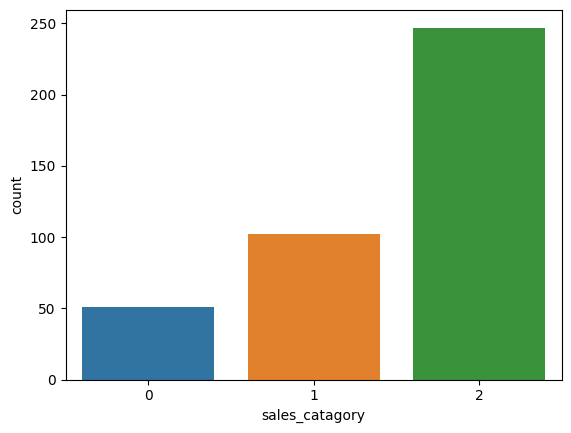

In [82]:
sns.countplot(x=y,data=data)

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

Create the Model

In [84]:
rf= RandomForestClassifier(n_estimators=150,max_features=4)

In [85]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_features=4, n_estimators=150)

In [86]:
y_predict = rf.predict(x_test)

In [87]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.20      0.32        20
           1       0.77      0.57      0.65        30
           2       0.69      0.91      0.79        70

    accuracy                           0.71       120
   macro avg       0.75      0.56      0.59       120
weighted avg       0.73      0.71      0.67       120



In [88]:
imp_features = rf.feature_importances_

In [89]:
imp_features

array([0.12513523, 0.10871367, 0.08476611, 0.12101667, 0.19707092,
       0.13333839, 0.13849317, 0.0637189 , 0.01350059, 0.01424635])

Text(0, 0.5, 'Features Names')

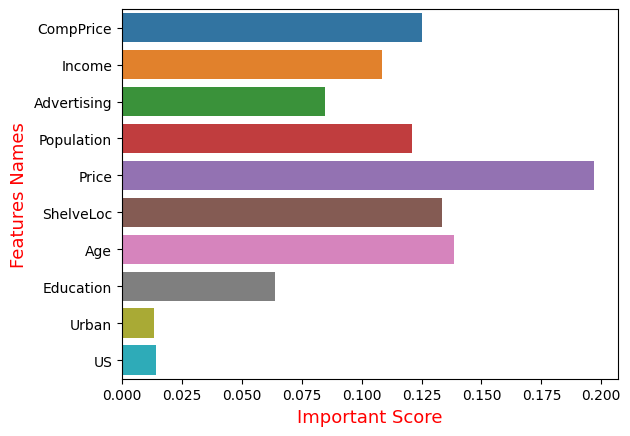

In [90]:
sns.barplot(x=imp_features,y=x.columns)
plt.xlabel("Important Score",size=13,color="r")
plt.ylabel("Features Names",size=13,color="r")

In [91]:
cm = confusion_matrix(y_test,y_predict)

<Axes: >

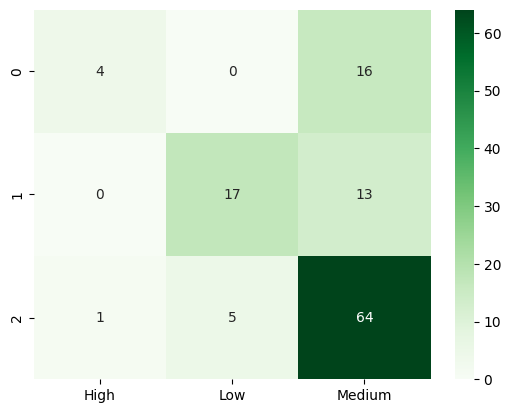

In [92]:
sns.heatmap(cm,annot=True,cmap="Greens",xticklabels=["High","Low","Medium"])